<a href="https://colab.research.google.com/github/chndnsingh1403/github-slideshow/blob/My-slide/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


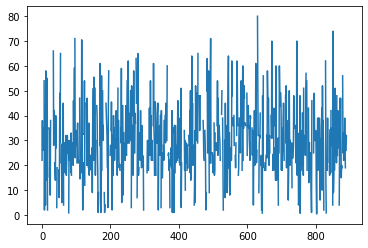

In [4]:
data['Age'].plot()

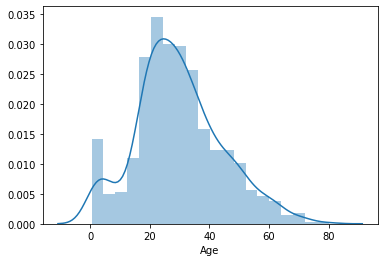

In [5]:
sns.distplot(data['Age'])

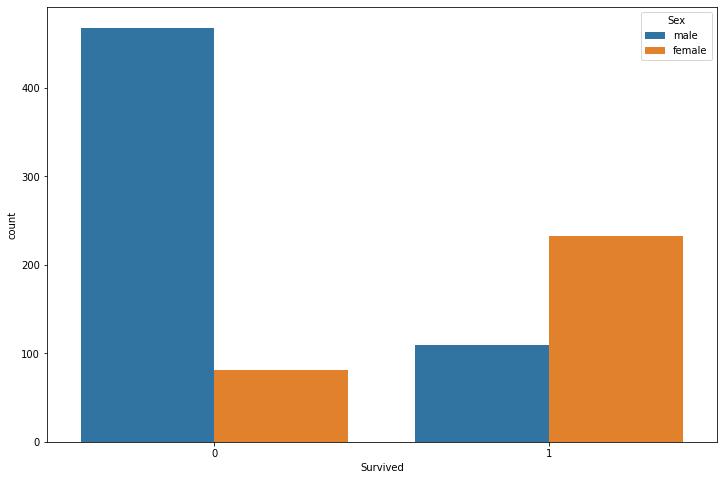

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x='Survived', data=data, hue='Sex')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
features=['Sex', 'Pclass', 'SibSp', 'Parch', 'Fare']

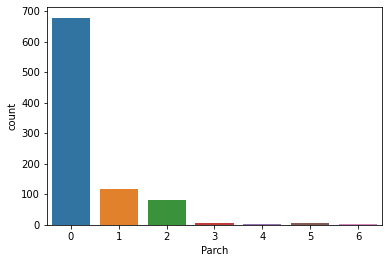

In [28]:
sns.countplot(x='Parch',data=data)

In [29]:
X = data[features]
X.head()

,Sex,Pclass,SibSp,Parch,Fare
0,male,3,1,0,7.2500
1,female,1,1,0,71.2833
2,female,3,0,0,7.9250
3,female,1,1,0,53.1000
4,male,3,0,0,8.0500


In [30]:
pd.get_dummies(X)

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,1,0,7.2500,0,1
1,1,1,0,71.2833,1,0
2,3,0,0,7.9250,1,0
3,1,1,0,53.1000,1,0
4,3,0,0,8.0500,0,1
...,...,...,...,...,...,...
886,2,0,0,13.0000,0,1
887,1,0,0,30.0000,1,0
888,3,1,2,23.4500,1,0
889,1,0,0,30.0000,0,1


In [31]:
X = pd.get_dummies(X)
y = data['Survived']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20) 

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [35]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)


[[101  12]
 [ 24  42]]


0.7988826815642458

In [124]:
def modFeat(X):
  from sklearn.impute import SimpleImputer
  age = X.iloc[:, 0:1].values
  si = SimpleImputer(missing_values=np.nan, strategy='mean')
  si.fit(age)
  X.loc[:,'Age'] = si.transform(age)
  from sklearn.preprocessing import LabelEncoder
  le = LabelEncoder()
  X.loc[:, 'Sex'] = le.fit_transform(X['Sex'])
  
  fare = X.iloc[:, 5:6].values
  si2 = SimpleImputer(missing_values=np.nan, strategy='mean')
  si2.fit(fare)
  X.loc[:,'Age'] = si2.transform(fare)
  
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X['Fare'] = sc.fit_transform(fare)
  return X


In [118]:
features=['Age','Sex', 'Pclass', 'SibSp', 'Parch', 'Fare']
X = modFeat(data[features])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [119]:
X.head()

,Age,Sex,Pclass,SibSp,Parch,Fare
0,7.2500,1,3,1,0,-0.502445
1,71.2833,0,1,1,0,0.786845
2,7.9250,0,3,0,0,-0.488854
3,53.1000,0,1,1,0,0.420730
4,8.0500,1,3,0,0,-0.486337


In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20) 

In [121]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X, y)
y_pred = rfc.predict(X_test)

In [122]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

[[96  7]
 [10 66]]


0.9050279329608939

In [125]:
testData = pd.read_csv('test.csv')
pred = rfc.predict(modFeat(testData[features]))

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

ValueError: ignored

In [115]:
testData[features].head()

,Age,Sex,Pclass,SibSp,Parch,Fare
0,34.5,male,3,0,0,7.8292
1,47.0,female,3,1,0,7.0000
2,62.0,male,2,0,0,9.6875
3,27.0,male,3,0,0,8.6625
4,22.0,female,3,1,1,12.2875


In [126]:
testData[features].isnull().sum()

Age       86
Sex        0
Pclass     0
SibSp      0
Parch      0
Fare       1
dtype: int64